In [34]:
import os
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import warnings
import logging
warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

In [3]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
os.chdir(os.path.dirname(os.path.dirname(dir_path)))
os.getcwd()

'C:\\Users\\manash.jyoti.konwar\\Documents\\AI_Random_Projects\\Research-Catastrophic-Detection'

In [14]:
# Reading Data
weather_data = pd.read_csv(r'rainfall_prediction\data\jennings_ghcnd.csv')
pd.set_option("display.max_columns", None)
weather_data = weather_data[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'EVAP',
            'MNPN', 'MXPN', 'PRCP', 'SN32', 'SN52', 'SNOW', 'SNWD', 'SX52', 'TMAX',
            'TMIN', 'TOBS', 'WDMV']]
weather_data.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,EVAP,MNPN,MXPN,PRCP,SN32,SN52,SNOW,SNWD,SX52,TMAX,TMIN,TOBS,WDMV
0,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-01,0.09,45.0,61.0,0.05,NaN,49.0,0.0,0.0,58.0,62.0,42,42,46.0
1,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-02,0.07,37.0,59.0,0.00,NaN,42.0,0.0,0.0,55.0,53.0,35,37,32.9
2,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-03,0.05,34.0,52.0,0.00,NaN,41.0,0.0,0.0,52.0,53.0,33,33,37.3
3,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-04,0.07,36.0,50.0,0.00,NaN,42.0,0.0,0.0,51.0,50.0,33,37,29.8
4,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-05,NaN,NaN,NaN,0.00,NaN,37.0,0.0,0.0,43.0,39.0,27,27,69.0
5,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-06,NaN,NaN,NaN,0.00,NaN,37.0,0.0,0.0,47.0,45.0,26,31,19.3
6,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-07,NaN,NaN,NaN,0.06,NaN,37.0,0.0,0.0,45.0,50.0,28,49,65.2
7,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-08,NaN,NaN,NaN,0.50,NaN,35.0,0.0,0.0,45.0,52.0,24,24,118.1
8,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-09,NaN,NaN,NaN,0.00,NaN,33.0,0.0,0.0,37.0,33.0,20,25,82.0
9,USC00164700,"JENNINGS, LA US",30.2002,-92.6641,7.6,2010-01-10,NaN,NaN,NaN,0.00,NaN,33.0,0.0,0.0,38.0,38.0,21,24,36.0


In [15]:
weather_data['PRCP_mm'] = weather_data['PRCP'].apply(lambda x: x*25.4)

In [16]:
# Extracting data types from weather data
numerical_feature = [feature for feature in weather_data.columns if weather_data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(weather_data[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in weather_data.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 17
Discrete feature Count 6
Continuous feature Count 11
Categorical feature Count 3


In [17]:
# Checking null count percentage
weather_data.isnull().sum()*100/len(weather_data)

STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
DATE          0.000000
EVAP          1.900291
MNPN         10.708697
MXPN         10.775766
PRCP          0.000000
SN32         99.374022
SN52         83.612788
SNOW         90.968030
SNWD         90.945674
SX52         82.986810
TMAX          0.022356
TMIN          0.000000
TOBS          0.000000
WDMV          1.542589
PRCP_mm       0.000000
dtype: float64

In [18]:
print(numerical_feature)

['LATITUDE', 'LONGITUDE', 'ELEVATION', 'EVAP', 'MNPN', 'MXPN', 'PRCP', 'SN32', 'SN52', 'SNOW', 'SNWD', 'SX52', 'TMAX', 'TMIN', 'TOBS', 'WDMV', 'PRCP_mm']


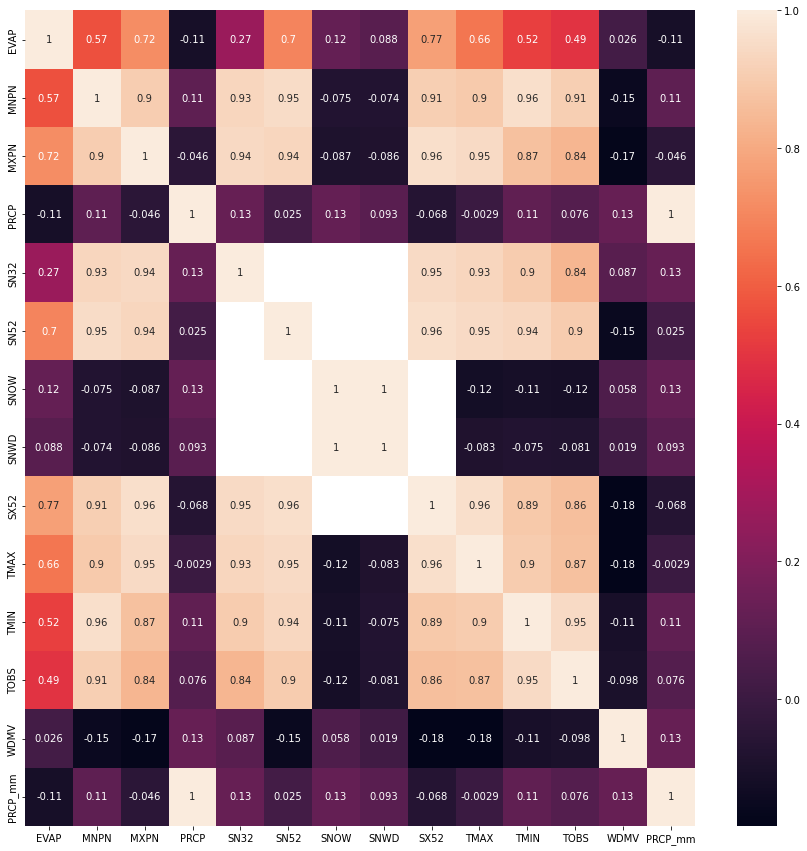

In [19]:
corrmat = weather_data[list(weather_data.columns[6:])].corr(method = "spearman")
plt.figure(figsize=(15, 15))
g = sns.heatmap(corrmat, annot=True)

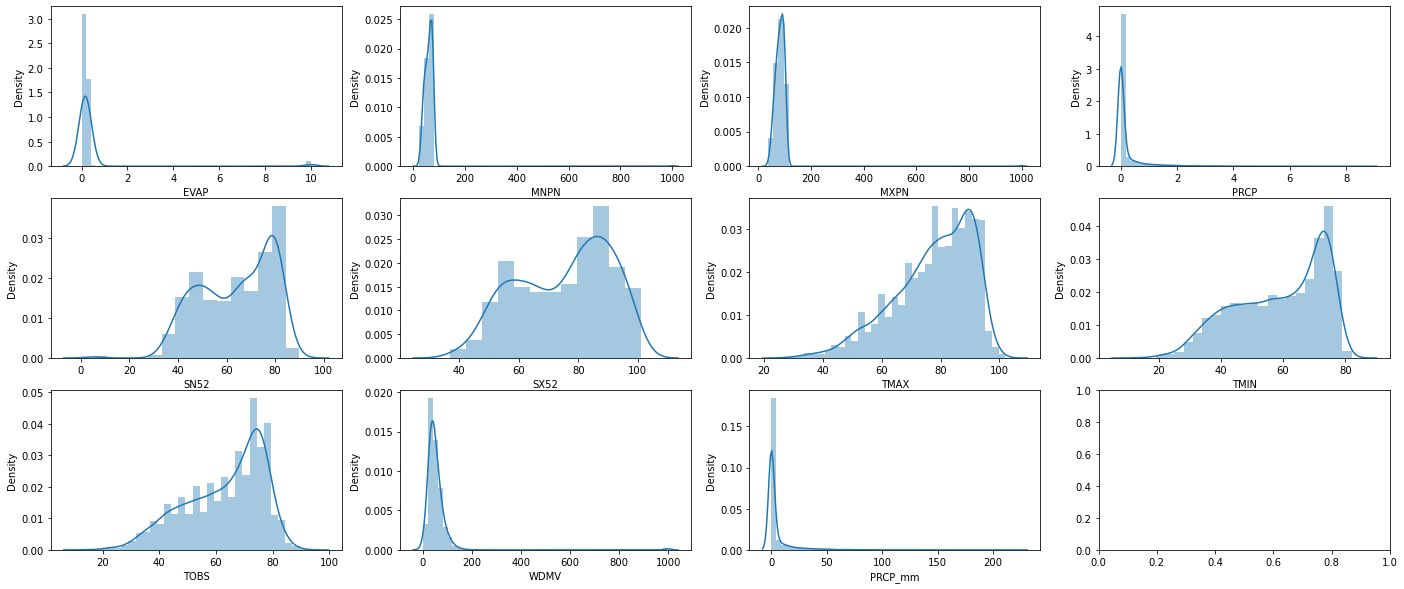

In [20]:
fig, ax_collection = plt.subplots(3,4,figsize=(24,10))

row_counter = 0
col_counter = 0
for feature in continuous_feature:
    try:
        if col_counter>3:
            row_counter+=1
            col_counter=0
        data=weather_data.copy()
        sns.distplot(weather_data[feature], ax=ax_collection[row_counter][col_counter])
        col_counter+=1
    except Exception as ex:
        print(ex)

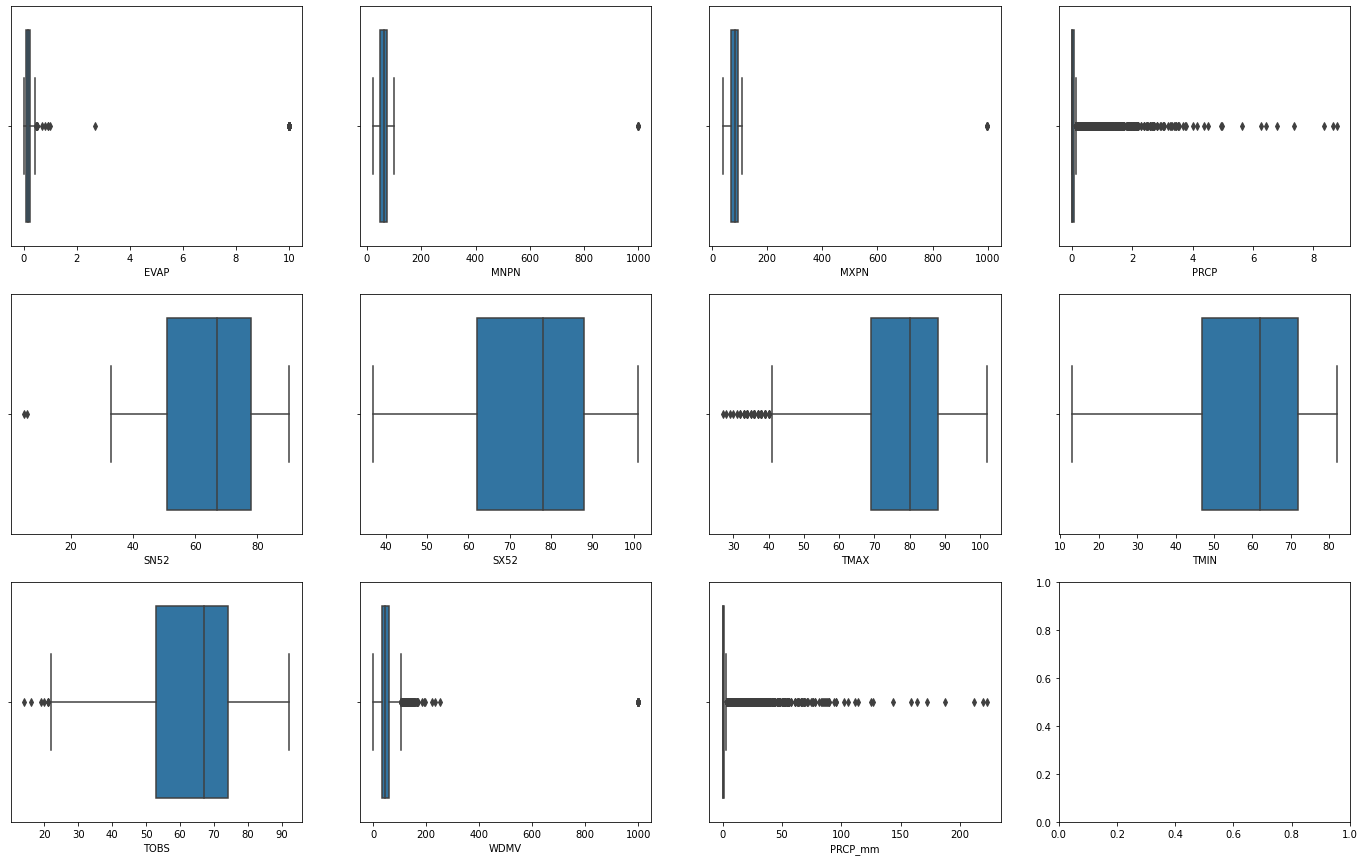

In [25]:
fig, ax_collection = plt.subplots(3,4,figsize=(24,15))

row_counter = 0
col_counter = 0
for feature in continuous_feature:
    try:
        if col_counter>3:
            row_counter+=1
            col_counter=0
        data=weather_data.copy()
        sns.boxplot(weather_data[feature], ax=ax_collection[row_counter][col_counter])
        col_counter+=1
    except Exception as ex:
        print(ex)

In [27]:
for feature in continuous_feature:
    if(weather_data[feature].isnull().sum()*100/len(weather_data))>0:
        weather_data[feature] = weather_data[feature].fillna(weather_data[feature].median())

In [28]:
weather_data.isnull().sum()*100/len(weather_data)

STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
DATE          0.000000
EVAP          0.000000
MNPN          0.000000
MXPN          0.000000
PRCP          0.000000
SN32         99.374022
SN52          0.000000
SNOW         90.968030
SNWD         90.945674
SX52          0.000000
TMAX          0.000000
TMIN          0.000000
TOBS          0.000000
WDMV          0.000000
PRCP_mm       0.000000
dtype: float64

EVAP


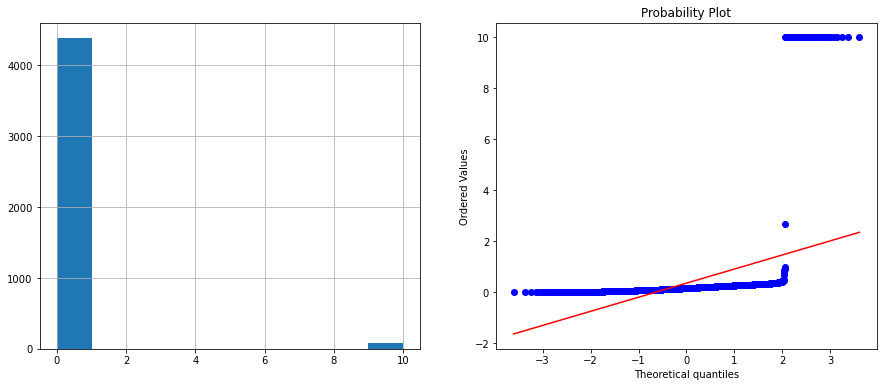

MNPN


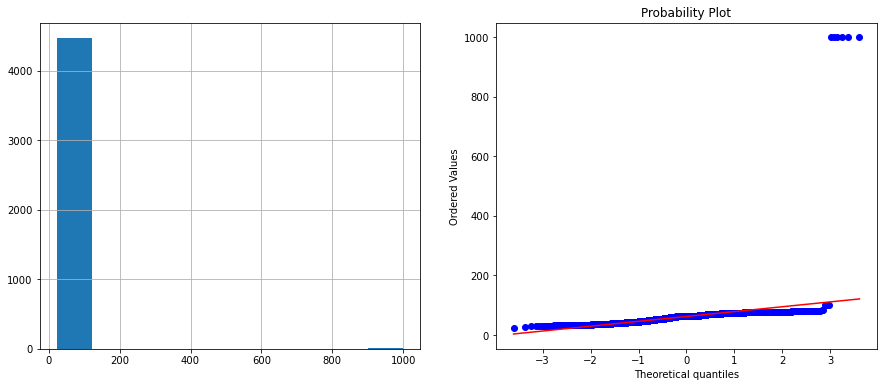

MXPN


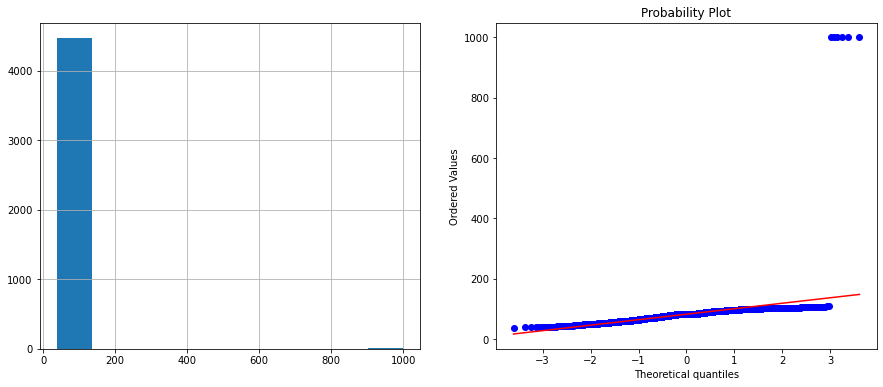

PRCP


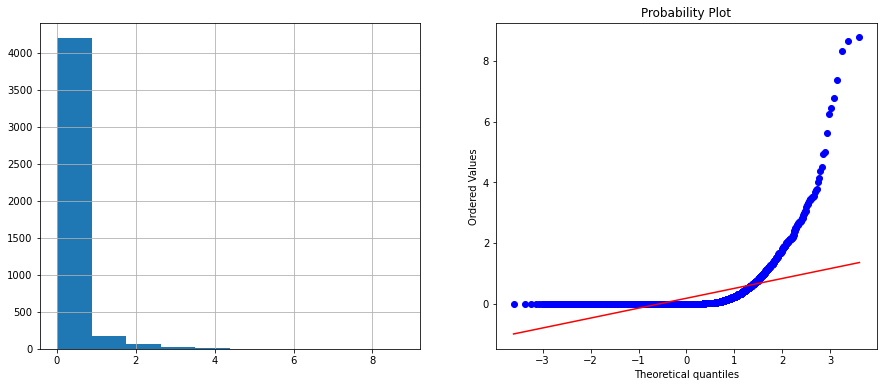

SN52


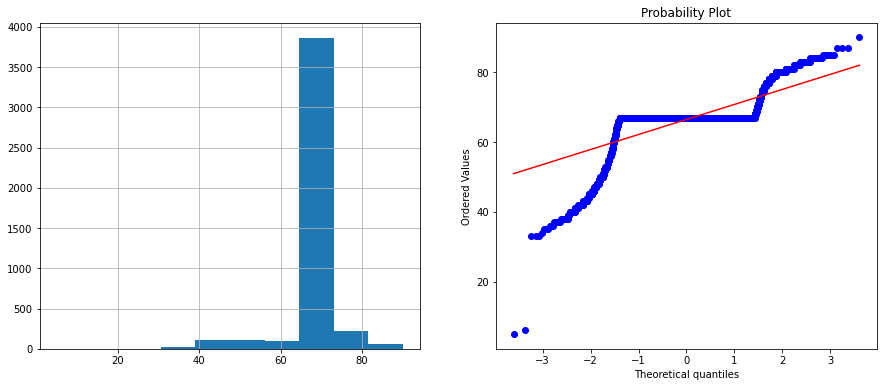

SX52


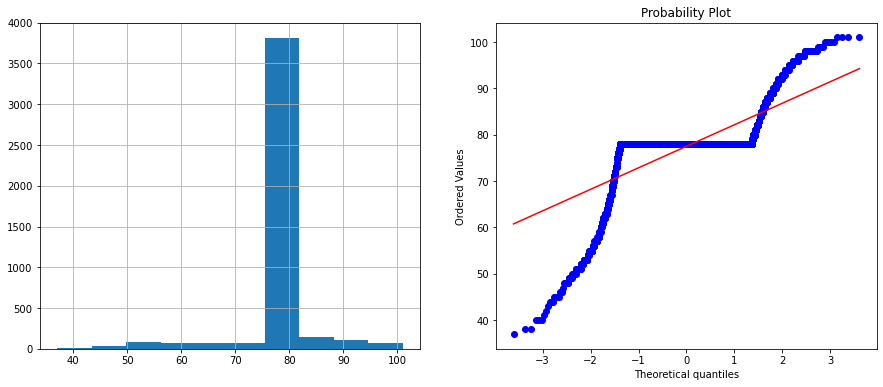

TMAX


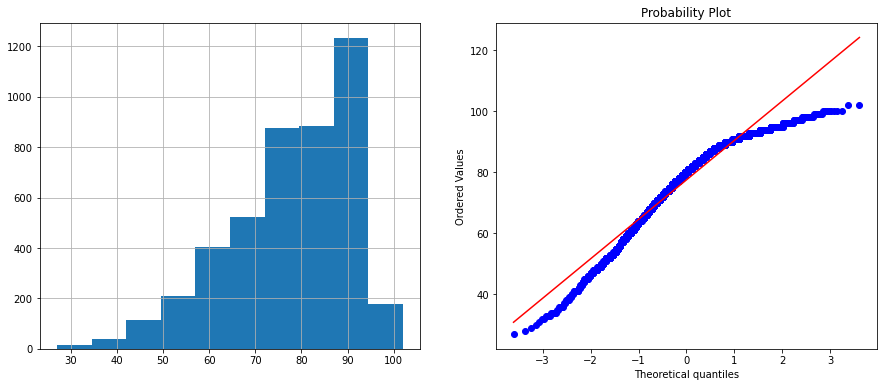

TMIN


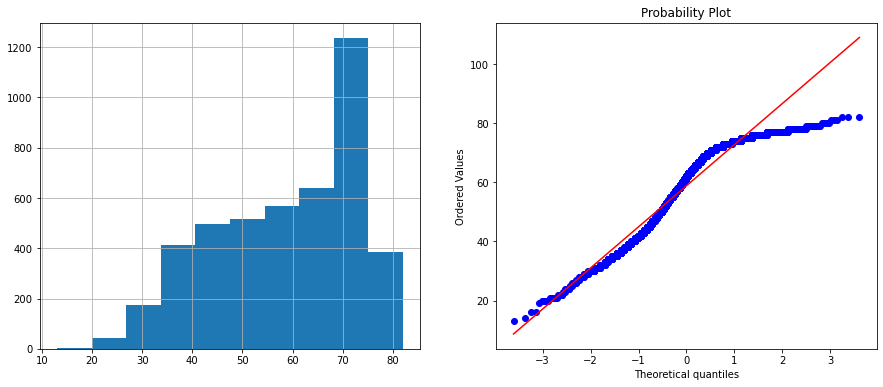

TOBS


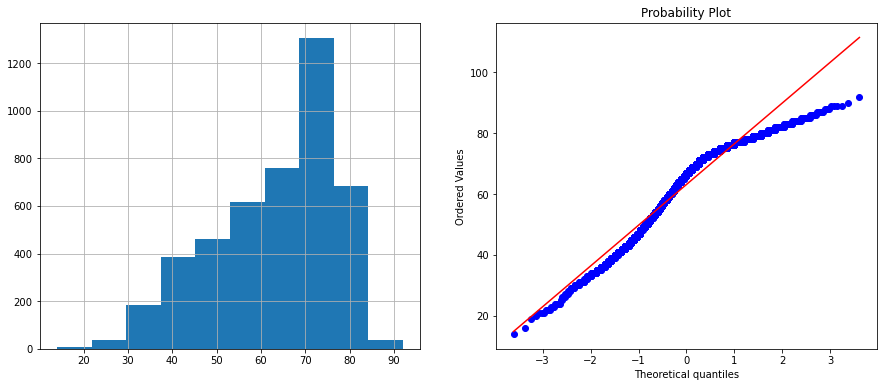

WDMV


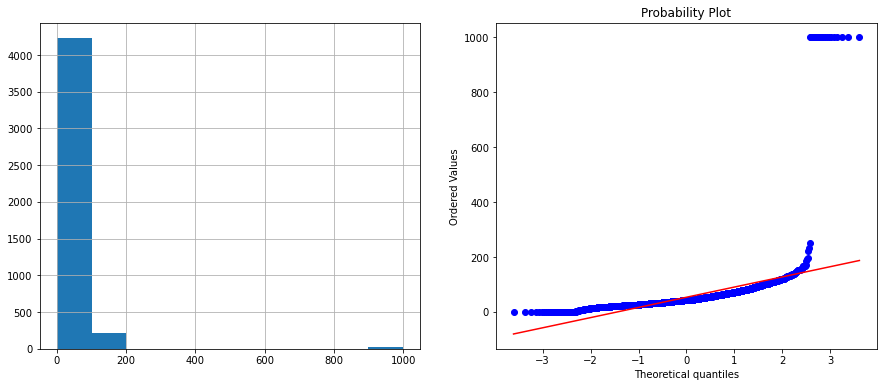

PRCP_mm


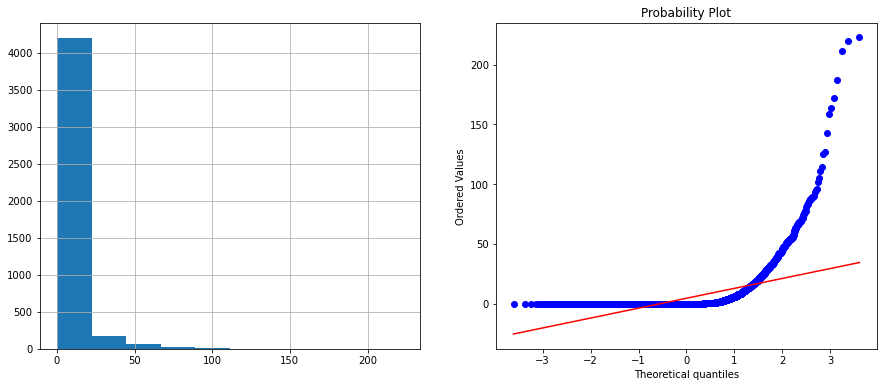

In [35]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    weather_data[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(weather_data[feature], dist="norm", plot=plt)
    plt.show()